In [1]:
!pip install numpy pandas scipy

In [19]:
import pandas as pd
import numpy as np
from statistics import mode
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns


**Section A**

In [3]:
# Question 1.)


admissions = [32, 28, 35, 30, 29, 27, 31, 34, 33, 30]
admissions_series = pd.Series(admissions)

# Calculate central tendency
mean_val = admissions_series.mean()
median_val = admissions_series.median()
mode_val = mode(admissions)

print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)

# Increase all values by 10%
increased_admissions = admissions_series * 1.10

# Calculate new central tendency
mean_new = increased_admissions.mean()
median_new = increased_admissions.median()
mode_new = mode(increased_admissions.round())

print("\nAfter 10% Increase:")
print("New Mean:", round(mean_new, 2))
print("New Median:", round(median_new, 2))
print("New Mode:", mode_new)

Mean: 30.9
Median: 30.5
Mode: 30

After 10% Increase:
New Mean: 33.99
New Median: 33.55
New Mode: 33.0


In [4]:
# Question 2.)

recovery_days = [5, 7, 6, 8, 9, 5, 6, 7, 8, 6]
recovery_series = pd.Series(recovery_days)

# Calculating range, variance, and standard deviation
range_val = recovery_series.max() - recovery_series.min()
variance_val = recovery_series.var()
std_dev_val = recovery_series.std()

print("Range:", range_val)
print("Variance:", round(variance_val, 2))
print("Standard Deviation:", round(std_dev_val, 2))

## after adding2 new patients

updated_series = recovery_series.tolist() + [4, 10]
updated_series = pd.Series(updated_series)
updated_std_dev = updated_series.std()

print("Updated Standard Deviation (after adding 4 and 10):", round(updated_std_dev, 2))

Range: 4
Variance: 1.79
Standard Deviation: 1.34
Updated Standard Deviation (after adding 4 and 10): 1.76


**Standard Deviation Analysis (after adding 2 new patients having recovering time [4, 10])**-  

The original standard deviation indicates moderate variability in recovery times, suggesting most patients recover within a few days of each other.
Adding 4 and 10 increases the spread, hence the standard deviation increases, showing more variability in recovery durations.

In [5]:
# Question 3.)
scores = [8, 9, 7, 8, 10, 7, 9, 6, 10, 8, 7, 9]
scores_series = pd.Series(scores)

# Compute skewness and kurtosis
score_skewness = skew(scores)
score_kurtosis = kurtosis(scores)  # default is Fisher’s (normal = 0)

print("Skewness:", round(score_skewness, 2))
print("Kurtosis:", round(score_kurtosis, 2))

Skewness: -0.04
Kurtosis: -1.01


**kewness = -0.04** → very close to 0, indicating almost perfect symmetry.

**Kurtosis = -1.01** → slightly platykurtic, meaning the distribution is a bit flatter than a normal bell curve (lighter tails and lower peak).

Overall, this suggests the data is approximately normally distributed, with no significant outliers or heavy tails.

 **What if satisfaction scores shift higher ?**
 more patients start giving higher scores (closer to 10), the distribution would shift leftward, resulting in negative skewness.
This means skewness will decrease further (become more negative) because most values concentrate near 10, and any variation would be on the lower side.

In [7]:
# Question 4.)

nurses = [10, 12, 15, 18, 20, 22]
recovery_time = [8, 7, 6, 5, 4, 3]

nurse_series = pd.Series(nurses)
recovery_series = pd.Series(recovery_time)

# Compute Pearson correlation coefficient
correlation = nurse_series.corr(recovery_series)

print("Correlation Coefficient:", round(correlation, 2))

Correlation Coefficient: -1.0


**Interpretation**
The correlation coefficient is -1.0, indicating a perfect negative linear relationship between the number of nurses and patient recovery time.
As the number of nurses increases, recovery time consistently decreases.

P**rediction after Adding 5 Nurses per Department:**
If the hospital increases the number of nurses by 5 in each department (i.e., all values shift upward), the correlation will not change, because correlation is scale-invariant.

**But if the current trend continues, we can predict:**

Increasing nurse count per department is likely to further reduce average recovery time, continuing the current downward trend.

**Section B**

In [10]:
# Question 5.
wait_times = [32, 29, 31, 34, 33, 27, 30, 28, 35, 26]
sample_mean = np.mean(wait_times)

# Perform one-sample t-test (H0: mean = 30)
t_stat, p_value = ttest_1samp(wait_times, popmean=30)

# One-tailed test: divide p-value by 2
p_value_one_tailed = p_value / 2

print("Sample Mean:", round(sample_mean, 2))
print("t-statistic:", round(t_stat, 2))
print("One-tailed p-value:", round(p_value_one_tailed, 4))

Sample Mean: 30.5
t-statistic: 0.52
One-tailed p-value: 0.3071


**Interpretation**
If p-value < 0.05, reject H₀ → The average wait time significantly exceeds 30 minutes.

If p-value ≥ 0.05, fail to reject H₀ → The hospital’s claim is valid.

**If Wait Time Is Significantly High — Recommendations:**
If the test shows a significant increase in wait time, the hospital could:

Increase emergency department staffing during peak hours.

Implement a triage prioritization system to fast-track less complex cases.

Use a real-time queue monitoring and patient communication system.

Analyze arrival patterns to better allocate resources.

In [14]:

# Question 6.

data = [[90, 10],
        [60, 40],
        [30, 70]]

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", round(chi2_stat, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p_value, 4))


Chi-Square Statistic: 75.0
Degrees of Freedom: 2
p-value: 0.0


**Hypotheses:**
H₀ (Null Hypothesis): Cleanliness and patient satisfaction are independent.

H₁ (Alternative Hypothesis): Cleanliness and patient satisfaction are dependent.

Decision:
If p-value < 0.05, reject H₀ → cleanliness and satisfaction are dependent.

If p-value ≥ 0.05, fail to reject H₀ → they are independent.

**If Cleanliness Improves — What to Expect:**
As cleanliness improves (e.g., from Low → Medium → High), we expect the number of satisfied patients to increase, and unsatisfied patients to decrease.

In [16]:
# Question 7.

treatment_A = [5, 6, 7, 5, 6]
treatment_B = [8, 9, 7, 8, 10]
treatment_C = [4, 5, 6, 5, 4]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(treatment_A, treatment_B, treatment_C)

print("F-statistic:", round(f_stat, 2))
print("p-value:", round(p_value, 4))


F-statistic: 19.19
p-value: 0.0002


**Interpretations**
Null Hypothesis (H₀):
There is no significant difference in mean recovery durations across Treatments A, B, and C.

Alternative Hypothesis (H₁):
At least one treatment differs significantly in recovery duration.

**Decision:**
If p-value < 0.05, reject H₀ ⇒ at least one group differs.

If p-value ≥ 0.05, fail to reject H₀ ⇒ no statistically significant difference found.

**Adding Treatment D**
If the hospital wants to introduce Treatment D, it should collect:

Recovery durations (in days) from a sample of patients who received Treatment D.

Sample size should be comparable (e.g., 5–10 patients) to other groups.


Shapiro-Wilk Test Statistic: 0.971
p-value: 0.9201


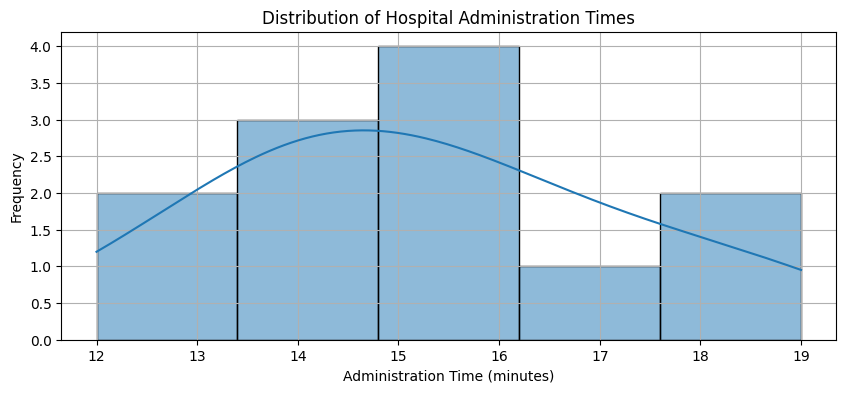

In [18]:
# Question 8

admin_times = [12, 15, 14, 16, 18, 13, 14, 17, 15, 19, 16, 14]

# Shapiro-Wilk Test for Normality
stat, p_value = shapiro(admin_times)

print("Shapiro-Wilk Test Statistic:", round(stat, 3))
print("p-value:", round(p_value, 4))

# Visualization
plt.figure(figsize=(10,4))
sns.histplot(admin_times, kde=True)
plt.title("Distribution of Hospital Administration Times")
plt.xlabel("Administration Time (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Initial Analysis**
Null Hypothesis (H₀):
The data follows a normal distribution.

Alternative Hypothesis (H₁):
The data does not follow a normal distribution.

**Decision Rule:**
If p-value > 0.05, fail to reject H₀ → data is likely normal.

If p-value ≤ 0.05, reject H₀ → data not normally distributed.

**Why is this Analysis Important-**
Statistical Assumptions: Many healthcare statistical models (t-tests, ANOVA, regression) assume normality.

Resource Planning: Knowing if time distributions are normal helps in capacity planning and identifying outliers or bottlenecks.

Predictive Modeling: Accurate modeling of service time can improve scheduling and staff allocation.

**If Emergency Cases Increase**
You would expect greater variability and possibly:

Positive skewness (more long-delay cases).

A wider spread or long tail in the distribution.

Non-normal distribution, requiring non-parametric methods


Probability of exactly 3 emergency arrivals in next hour: 0.1404


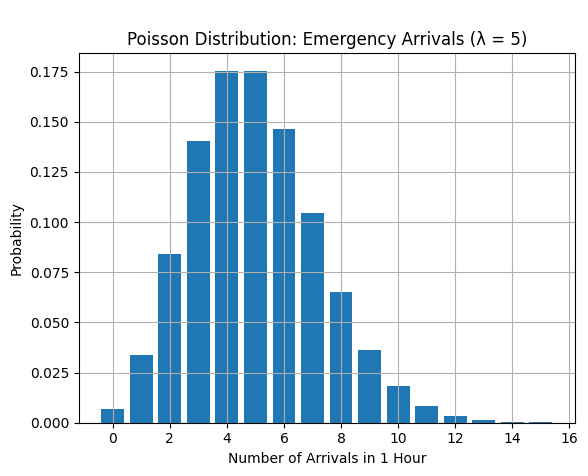

In [21]:
# Question 9.

# Average arrival rate (λ)
λ = 5

# Probability of exactly 3 arrivals
prob_3 = poisson.pmf(3, λ)

print(f"Probability of exactly 3 emergency arrivals in next hour: {round(prob_3, 4)}")

# poisson model
x = range(0, 16)
pmf_values = [poisson.pmf(k, λ) for k in x]

# Plot the distribution
plt.bar(x, pmf_values)
plt.title("\nPoisson Distribution: Emergency Arrivals (λ = 5)")
plt.xlabel("Number of Arrivals in 1 Hour")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

**If a Major Accident Occurs:**
The average arrival rate (λ) would increase sharply.

**The distribution would shift rightward, i.e:**

Probabilities of higher counts (e.g., 10+) would increase.

Lower-count probabilities (like P(X=3)) would decrease.

The distribution becomes more spread out (higher variance).

   Surgeries  Frequency  Probability  Weighted
0          0          5     0.072464  0.000000
1          1         12     0.173913  0.173913
2          2         18     0.260870  0.521739
3          3          4     0.057971  0.173913
4          5         22     0.318841  1.594203
5         15          8     0.115942  1.739130

Expected number of surgeries per day: 4.2


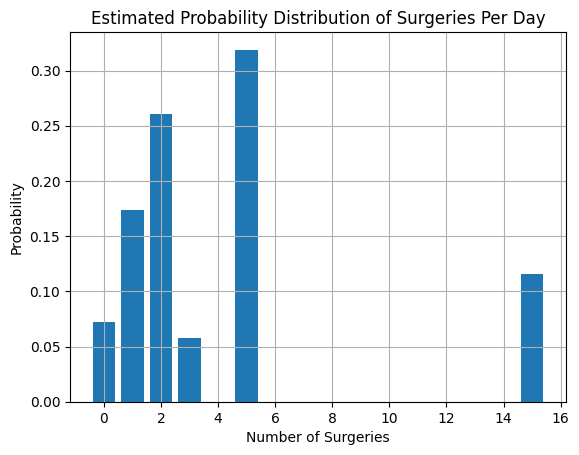

In [22]:
# Question 10.

surgeries = [0, 1, 2, 3, 5, 15]
frequency = [5, 12, 18, 4, 22, 8]

# Create a DataFrame
df = pd.DataFrame({'Surgeries': surgeries, 'Frequency': frequency})

# Total number of days
total_days = df['Frequency'].sum()

# Probability distribution (relative frequency)
df['Probability'] = df['Frequency'] / total_days

# Expected value (mean number of surgeries per day)
df['Weighted'] = df['Surgeries'] * df['Probability']
expected_value = df['Weighted'].sum()

# Displaying dataframe  results
print(df)
print("\nExpected number of surgeries per day:", round(expected_value, 2))

# Plot the probability distribution
plt.bar(df['Surgeries'], df['Probability'])
plt.title("Estimated Probability Distribution of Surgeries Per Day")
plt.xlabel("Number of Surgeries")
plt.ylabel("Probability")
plt.grid(True)
plt.show()